In [1]:
from pyboolnet.state_transition_graphs import primes2stg
from pyboolnet.external.bnet2primes import bnet_text2primes
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

np.set_printoptions(linewidth=1000, precision=2)

bnet = """
targets, factors
A, A | B & C
B, B & !C
C, B & !C | !C & !D | !B & C & D
D, !A & !B & !C & !D | !A & C & D
"""
primes = bnet_text2primes(bnet)
update = "asynchronous"
stg = primes2stg(primes, update)

stg

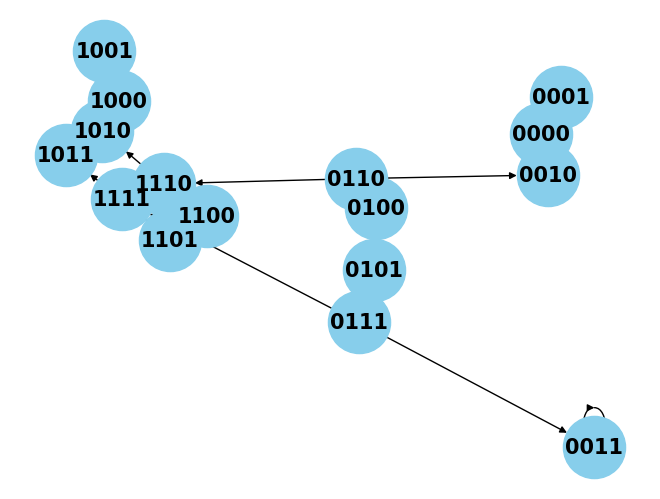

In [2]:
# Draw the graph
nx.draw(stg, with_labels=True, node_color='skyblue', node_size=2000, font_size=15, font_weight='bold')

# Display the graph
plt.show()

In [3]:
def get_transition_matrix(stg):

    N = len(list(stg.nodes())[0])

    transition_matrix = np.zeros((2**N,2**N))

    transition_matrix

    states = sorted(list(stg.nodes()))

    for state in states:
        index = states.index(state)

        # print(index)

        out_edges = stg.out_edges(state)

        for out_edge in out_edges:
            out_index = states.index(out_edge[1])

            if out_index == index:
                continue

            transition_matrix[index][out_index] = 1/N

        transition_matrix[index][index] = 1 - np.sum(transition_matrix[index])

    return transition_matrix


def get_hamming_distance_matrix(stg):

    states = sorted(list(stg.nodes()))

    N = len(list(stg.nodes())[0])

    hamming_distance_matrix = np.zeros((2**N,2**N))

    for state1 in states:
        index1 = states.index(state1)

        for state2 in states:
            index2 = states.index(state2)

            for i in range(N):
                if state1[i] != state2[i]:
                    hamming_distance_matrix[index1][index2] += 1

    return hamming_distance_matrix

def get_bitflip_matrix(hd, size):

    # size should be between 1 and len(hd)
    if size < 1 or size > len(hd):
        raise ValueError("size should be between 1 and len(hd)")

    bitflip_matrix = np.zeros((len(hd), len(hd)))

    for i in range(len(hd)):
        for j in range(len(hd)):
            if hd[i][j] == size:
                bitflip_matrix[i][j] = 1

    for i in range(len(hd)):
        bitflip_matrix[i] = bitflip_matrix[i] / np.sum(bitflip_matrix[i])

    return bitflip_matrix


tm = get_transition_matrix(stg)
print(tm)

hd = get_hamming_distance_matrix(stg)
print(hd)

bf = get_bitflip_matrix(hd, 1)
print(bf)

[[0.5  0.25 0.25 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.25 0.75 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.25 0.   0.75 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   1.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.75 0.   0.25 0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.25 0.5  0.   0.25 0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.25 0.   0.25 0.   0.25 0.   0.   0.   0.   0.   0.   0.   0.25 0.  ]
 [0.   0.   0.   0.25 0.   0.25 0.   0.25 0.   0.   0.   0.   0.   0.   0.   0.25]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.75 0.   0.25 0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.25 0.75 0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.25 0.   0.75 0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.25 0.75 0.   0.   0.   0.  ]
 [0.

In [4]:
def reorder_matrix(matrix, index_list):
    # Check if the length of index_list matches the dimensions of the matrix
    if len(index_list) != matrix.shape[0] or len(index_list) != matrix.shape[1]:
        raise ValueError("The length of index_list must match the size of the matrix (n x n).")
    


    # Reorder rows and columns according to the index list
    reordered_matrix = matrix[index_list, :][:, index_list]
    return reordered_matrix

print("Original Matrix:")
print(tm)

reordered_matrix = reorder_matrix(tm, [5,7,4,6,13,15,12,14,9,11,8,10,0,1,2,3])

print("\nReordered Matrix:")
print(reordered_matrix)

Original Matrix:
[[0.5  0.25 0.25 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.25 0.75 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.25 0.   0.75 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   1.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.75 0.   0.25 0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.25 0.5  0.   0.25 0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.25 0.   0.25 0.   0.25 0.   0.   0.   0.   0.   0.   0.   0.25 0.  ]
 [0.   0.   0.   0.25 0.   0.25 0.   0.25 0.   0.   0.   0.   0.   0.   0.   0.25]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.75 0.   0.25 0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.25 0.75 0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.25 0.   0.75 0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.25 0.75 0.   0. 

In [2]:
import numpy as np

np.zeros((0,0))

array([], shape=(0, 0), dtype=float64)